# Data Analysis

In [1]:
# See https://github.com/ultralytics/ultralytics/issues/1270 
!pip install opencv-python-headless

In [2]:
import os
import json
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Origin data
The description can be found [here](https://dentex.grand-challenge.org/data/).

In [3]:
path_qd = "./dentex_dataset/origin/quadrant_enumeration_disease"
os.listdir(path_qd)

['xrays', 'train_quadrant_enumeration_disease.json', '.ipynb_checkpoints']

In [4]:
with open("./dentex_dataset/origin/quadrant_enumeration_disease/train_quadrant_enumeration_disease.json", "r") as json_file:
    json_content = json.load(json_file)
    images = pd.DataFrame(json_content["images"])
    annotations = pd.DataFrame(json_content["annotations"])
    quadrant = pd.DataFrame(json_content["categories_1"])
    tooth_number = pd.DataFrame(json_content["categories_2"])
    disease = pd.DataFrame(json_content["categories_3"])

In [5]:
images

,height,width,id,file_name
0,1316,2744,1,train_673.png
1,1504,2872,2,train_283.png
2,1316,2909,3,train_435.png
3,1504,2872,4,train_95.png
4,1504,2872,5,train_475.png
...,...,...,...,...
700,1316,2910,701,train_338.png
701,1316,2851,702,train_657.png
702,1316,2850,703,train_344.png
703,1504,2872,704,train_599.png


In [6]:
annotations

,iscrowd,image_id,bbox,segmentation,id,area,category_id_1,category_id_2,category_id_3
0,0,1,"[542.0, 698.0, 220.0, 271.0]","[[621, 703, 573, 744, 542, 885, 580, 945, 650,...",1,39683,3,7,0
1,0,1,"[1952.0, 693.0, 177.0, 270.0]","[[2045, 693, 2109, 734, 2129, 915, 2047, 963, ...",2,33301,2,7,0
2,0,1,"[675.0, 708.0, 243.0, 300.0]","[[784, 711, 754, 746, 737, 821, 678, 916, 675,...",3,45758,3,6,1
3,0,1,"[1463.0, 725.0, 98.0, 425.0]","[[1464, 749, 1513, 725, 1550, 760, 1555, 798, ...",4,30985,2,2,1
4,0,1,"[1536.0, 753.0, 103.0, 381.0]","[[1543, 796, 1590, 753, 1622, 796, 1629, 840, ...",5,28044,2,3,1
...,...,...,...,...,...,...,...,...,...
3524,0,705,"[1851.2857142857142, 474.2857142857142, 117.14...","[[1885, 477, 1868, 597, 1859, 657, 1851, 728, ...",3525,28938,1,5,1
3525,0,705,"[1959.0, 479.9999999999999, 127.0, 274.2857142...","[[2005, 488, 1974, 479, 1965, 522, 1965, 588, ...",3526,23181,1,6,1
3526,0,705,"[2024.9999999999998, 463.0, 147.00000000000023...","[[2064, 463, 2024, 471, 2036, 559, 2056, 628, ...",3527,20023,1,7,3
3527,0,705,"[1921.7142857142856, 749.0, 221.28571428571445...","[[1942, 783, 1924, 806, 1921, 835, 1944, 872, ...",3528,32824,2,6,1


In [7]:
quadrant

,id,name,supercategory
0,0,1,1
1,1,2,2
2,2,3,3
3,3,4,4


In [8]:
tooth_number

,id,name,supercategory
0,0,1,1
1,1,2,2
2,2,3,3
3,3,4,4
4,4,5,5
5,5,6,6
6,6,7,7
7,7,8,8


In [9]:
disease

,id,name,supercategory
0,0,Impacted,Impacted
1,1,Caries,Caries
2,2,Periapical Lesion,Periapical Lesion
3,3,Deep Caries,Deep Caries


## First Example

Look into the first example in detail

In [10]:
images[:1]

,height,width,id,file_name
0,1316,2744,1,train_673.png


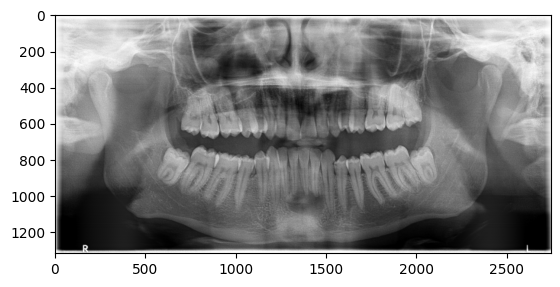

In [11]:
image_path = './dentex_dataset/origin/quadrant_enumeration_disease/xrays/train_673.png'
image = cv2.imread(image_path)
plt.imshow(image)

In [12]:
annotation = annotations[:1]
annotation

,iscrowd,image_id,bbox,segmentation,id,area,category_id_1,category_id_2,category_id_3
0,0,1,"[542.0, 698.0, 220.0, 271.0]","[[621, 703, 573, 744, 542, 885, 580, 945, 650,...",1,39683,3,7,0


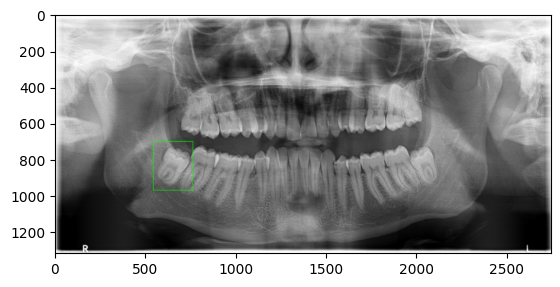

In [13]:
image_path = './dentex_dataset/origin/quadrant_enumeration_disease/xrays/train_673.png'
image = cv2.imread(image_path)

# Unpack bounding box coordinates
bbox = annotations["bbox"][0]

# Extract coordinates
x_min = int(bbox[0])
y_min = int(bbox[1])
width = int(bbox[2])
height = int(bbox[3])

# Convert to OpenCV bounding box format
cv2_bbox = (x_min, y_min, width, height)
# Draw bounding box
cv2.rectangle(image, cv2_bbox, (0, 255, 0), 2)  # Green rectangle with thickness 2

plt.imshow(image)

This tooth, quadrant: 4, number: 8 is impacted 

In [14]:
segmentation_mask = annotations["segmentation"][0]
segmentation_mask

[[621,
  703,
  573,
  744,
  542,
  885,
  580,
  945,
  650,
  969,
  711,
  883,
  762,
  807,
  748,
  741,
  649,
  698]]

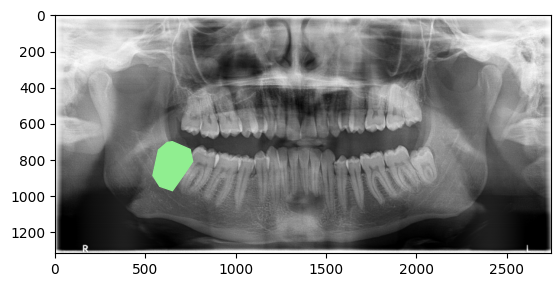

In [15]:
image_path = './dentex_dataset/origin/quadrant_enumeration_disease/xrays/train_673.png'
image = cv2.imread(image_path)

# Coordinates of the polygon
polygon_coords = annotations["segmentation"][0]

# Reshape the polygon coordinates into pairs of (x, y) points
points = np.array(polygon_coords).reshape(-1, 2)

# Fill the polygon with white color (255)
plt.fill(points[:, 0], points[:, 1], color='lightgreen')

# Display the segmentation overlaying on a blank image
plt.imshow(image)

## Data Analysis and Cleanup